<a href="https://colab.research.google.com/github/kumbhat10/Data_Science_in_Python/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Read the data

In [0]:
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [33]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [35]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


## Create First linear regression

### Define the dependent and independent variable

In [0]:
# y = b0 * x0  +   b1 * x1   ( x0 is constant = 1)
y = data['median_house_value']
x1 = data['median_income']


### Explore the data

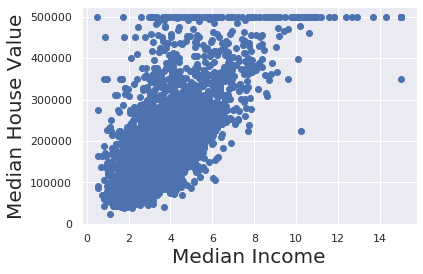

In [92]:
plt.scatter(x1,y)
plt.xlabel('Median Income',fontsize = 20)
plt.ylabel('Median House Value', fontsize = 20)
plt.show()

### Regeression Itself  - OLS - Ordinary Least Square

In [53]:
#  add a fixed constant 1 to vector x1 to make it nX2 matrix
x = sm.add_constant(x1)
print(x)

      const  median_income
0       1.0         6.6085
1       1.0         3.5990
2       1.0         5.7934
3       1.0         6.1359
4       1.0         2.9375
...     ...            ...
2995    1.0         1.1790
2996    1.0         3.3906
2997    1.0         2.2895
2998    1.0         3.2708
2999    1.0         8.5608

[3000 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
results = sm.OLS (y,x).fit()    # perform Ordinary Least Square regression 
print(results.summary() )
print('\n \n' , results.params)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     2478.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:38:11   Log-Likelihood:                -38261.
No. Observations:                3000   AIC:                         7.653e+04
Df Residuals:                    2998   BIC:                         7.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.962e+04   3490.668     14.216

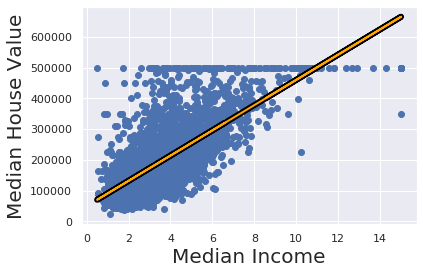

In [93]:
plt.scatter(x1,y)
y_new = results.params['const']  +  results.params['median_income']* x1  ### using the learned parameters
plt.plot(x1, y_new,c='black',lw=6)

plt.plot(x1,results.fittedvalues,c='orange',lw=2)    ## using the new learned fitted values
plt.xlabel('Median Income',fontsize = 20)
plt.ylabel('Median House Value', fontsize = 20)
plt.show()